UCI-HAR Dataset/
 ├── test/
 │    ├── Inertial Signals/   ← 원시(sensor signal)
 │    ├── X_test.txt          ← 561-feature matrix
 │    ├── y_test.txt          ← 라벨(1~6)
 │    ├── subject_test.txt    ← 사람이 누구인지(ID)
 │
 ├── train/
 │    ├── Inertial Signals/   ← 원시(sensor signal)
 │    ├── X_train.txt
 │    ├── y_train.txt
 │    ├── subject_train.txt
 │
 ├── README.txt               ← 설명서
 ├── activity_labels.txt      ← 활동명 매핑
 ├── features.txt             ← X 컬럼명 561개
 ├── features_info.txt        ← feature 의미 설명


In [2]:
import pandas as pd
import numpy as np


# 1. 데이터셋 생성

In [3]:
# features.txt를 로딩함, 561차원으로 데이터를 만들기 위함, X_train 읽을때 중복 에러 방지를 위해 미리 feature명 처리할 것

features = pd.read_csv(
    "UCI-HAR Dataset/features.txt",
    sep="\s+",
    header=None,
    names=["index", "feature"]
)

# 중복 feature 명 처리
feature_names = []
counter = {}

for f in features["feature"]:
    if f in counter:
        counter[f] += 1
        new_name = f"{f}_{counter[f]}"
        feature_names.append(new_name)
    else:
        counter[f] = 0
        feature_names.append(f)

len(feature_names), feature_names[:10]


(561,
 ['tBodyAcc-mean()-X',
  'tBodyAcc-mean()-Y',
  'tBodyAcc-mean()-Z',
  'tBodyAcc-std()-X',
  'tBodyAcc-std()-Y',
  'tBodyAcc-std()-Z',
  'tBodyAcc-mad()-X',
  'tBodyAcc-mad()-Y',
  'tBodyAcc-mad()-Z',
  'tBodyAcc-max()-X'])

In [4]:
# Index 별 feature명 확인
features

,index,feature
0,1,tBodyAcc-mean()-X
1,2,tBodyAcc-mean()-Y
2,3,tBodyAcc-mean()-Z
3,4,tBodyAcc-std()-X
4,5,tBodyAcc-std()-Y
...,...,...
556,557,"angle(tBodyGyroMean,gravityMean)"
557,558,"angle(tBodyGyroJerkMean,gravityMean)"
558,559,"angle(X,gravityMean)"
559,560,"angle(Y,gravityMean)"


In [5]:
# X_train.txt 로딩, 561차원의 센서 feature 
X_train = pd.read_csv(
    "UCI-HAR Dataset/train/X_train.txt",
    sep="\s+",
    header=None,
    names=feature_names
)
X_train.shape


(7352, 561)

In [6]:
X_train.head()

,tBodyAcc-mean()-X,tBodyAcc-mean()-Y,tBodyAcc-mean()-Z,tBodyAcc-std()-X,tBodyAcc-std()-Y,tBodyAcc-std()-Z,tBodyAcc-mad()-X,tBodyAcc-mad()-Y,tBodyAcc-mad()-Z,tBodyAcc-max()-X,...,fBodyBodyGyroJerkMag-meanFreq(),fBodyBodyGyroJerkMag-skewness(),fBodyBodyGyroJerkMag-kurtosis(),"angle(tBodyAccMean,gravity)","angle(tBodyAccJerkMean),gravityMean)","angle(tBodyGyroMean,gravityMean)","angle(tBodyGyroJerkMean,gravityMean)","angle(X,gravityMean)","angle(Y,gravityMean)","angle(Z,gravityMean)"
0,0.288585,-0.020294,-0.132905,-0.995279,-0.983111,-0.913526,-0.995112,-0.983185,-0.923527,-0.934724,...,-0.074323,-0.298676,-0.710304,-0.112754,0.030400,-0.464761,-0.018446,-0.841247,0.179941,-0.058627
1,0.278419,-0.016411,-0.123520,-0.998245,-0.975300,-0.960322,-0.998807,-0.974914,-0.957686,-0.943068,...,0.158075,-0.595051,-0.861499,0.053477,-0.007435,-0.732626,0.703511,-0.844788,0.180289,-0.054317
2,0.279653,-0.019467,-0.113462,-0.995380,-0.967187,-0.978944,-0.996520,-0.963668,-0.977469,-0.938692,...,0.414503,-0.390748,-0.760104,-0.118559,0.177899,0.100699,0.808529,-0.848933,0.180637,-0.049118
3,0.279174,-0.026201,-0.123283,-0.996091,-0.983403,-0.990675,-0.997099,-0.982750,-0.989302,-0.938692,...,0.404573,-0.117290,-0.482845,-0.036788,-0.012892,0.640011,-0.485366,-0.848649,0.181935,-0.047663
4,0.276629,-0.016570,-0.115362,-0.998139,-0.980817,-0.990482,-0.998321,-0.979672,-0.990441,-0.942469,...,0.087753,-0.351471,-0.699205,0.123320,0.122542,0.693578,-0.615971,-0.847865,0.185151,-0.043892


In [7]:
# y_train 로딩, subject ID 매핑

y_train = pd.read_csv(
    "UCI-HAR Dataset/train/y_train.txt",
    sep="\s+",
    header=None,
    names=["Activity"] # Activity 차후 class가 될 것
)

subject_train = pd.read_csv(
    "UCI-HAR Dataset/train/subject_train.txt",
    sep="\s+",
    header=None,
    names=["Subject"]
)


In [8]:
# train set 하나로 묶기
train_df = pd.concat([subject_train, y_train, X_train], axis=1)
train_df.head()


,Subject,Activity,tBodyAcc-mean()-X,tBodyAcc-mean()-Y,tBodyAcc-mean()-Z,tBodyAcc-std()-X,tBodyAcc-std()-Y,tBodyAcc-std()-Z,tBodyAcc-mad()-X,tBodyAcc-mad()-Y,...,fBodyBodyGyroJerkMag-meanFreq(),fBodyBodyGyroJerkMag-skewness(),fBodyBodyGyroJerkMag-kurtosis(),"angle(tBodyAccMean,gravity)","angle(tBodyAccJerkMean),gravityMean)","angle(tBodyGyroMean,gravityMean)","angle(tBodyGyroJerkMean,gravityMean)","angle(X,gravityMean)","angle(Y,gravityMean)","angle(Z,gravityMean)"
0,1,5,0.288585,-0.020294,-0.132905,-0.995279,-0.983111,-0.913526,-0.995112,-0.983185,...,-0.074323,-0.298676,-0.710304,-0.112754,0.030400,-0.464761,-0.018446,-0.841247,0.179941,-0.058627
1,1,5,0.278419,-0.016411,-0.123520,-0.998245,-0.975300,-0.960322,-0.998807,-0.974914,...,0.158075,-0.595051,-0.861499,0.053477,-0.007435,-0.732626,0.703511,-0.844788,0.180289,-0.054317
2,1,5,0.279653,-0.019467,-0.113462,-0.995380,-0.967187,-0.978944,-0.996520,-0.963668,...,0.414503,-0.390748,-0.760104,-0.118559,0.177899,0.100699,0.808529,-0.848933,0.180637,-0.049118
3,1,5,0.279174,-0.026201,-0.123283,-0.996091,-0.983403,-0.990675,-0.997099,-0.982750,...,0.404573,-0.117290,-0.482845,-0.036788,-0.012892,0.640011,-0.485366,-0.848649,0.181935,-0.047663
4,1,5,0.276629,-0.016570,-0.115362,-0.998139,-0.980817,-0.990482,-0.998321,-0.979672,...,0.087753,-0.351471,-0.699205,0.123320,0.122542,0.693578,-0.615971,-0.847865,0.185151,-0.043892


In [9]:
# test set도 동일하게 적용
X_test = pd.read_csv(
    "UCI-HAR Dataset/test/X_test.txt",
    sep="\s+",
    header=None,
    names=feature_names
)

y_test = pd.read_csv(
    "UCI-HAR Dataset/test/y_test.txt",
    sep="\s+",
    header=None,
    names=["Activity"]
)

subject_test = pd.read_csv(
    "UCI-HAR Dataset/test/subject_test.txt",
    sep="\s+",
    header=None,
    names=["Subject"]
)

test_df = pd.concat([subject_test, y_test, X_test], axis=1)


In [10]:
# train & test 합치기
full_df = pd.concat([train_df, test_df], axis=0).reset_index(drop=True)
full_df.shape


(10299, 563)

In [11]:
full_df.head()

,Subject,Activity,tBodyAcc-mean()-X,tBodyAcc-mean()-Y,tBodyAcc-mean()-Z,tBodyAcc-std()-X,tBodyAcc-std()-Y,tBodyAcc-std()-Z,tBodyAcc-mad()-X,tBodyAcc-mad()-Y,...,fBodyBodyGyroJerkMag-meanFreq(),fBodyBodyGyroJerkMag-skewness(),fBodyBodyGyroJerkMag-kurtosis(),"angle(tBodyAccMean,gravity)","angle(tBodyAccJerkMean),gravityMean)","angle(tBodyGyroMean,gravityMean)","angle(tBodyGyroJerkMean,gravityMean)","angle(X,gravityMean)","angle(Y,gravityMean)","angle(Z,gravityMean)"
0,1,5,0.288585,-0.020294,-0.132905,-0.995279,-0.983111,-0.913526,-0.995112,-0.983185,...,-0.074323,-0.298676,-0.710304,-0.112754,0.030400,-0.464761,-0.018446,-0.841247,0.179941,-0.058627
1,1,5,0.278419,-0.016411,-0.123520,-0.998245,-0.975300,-0.960322,-0.998807,-0.974914,...,0.158075,-0.595051,-0.861499,0.053477,-0.007435,-0.732626,0.703511,-0.844788,0.180289,-0.054317
2,1,5,0.279653,-0.019467,-0.113462,-0.995380,-0.967187,-0.978944,-0.996520,-0.963668,...,0.414503,-0.390748,-0.760104,-0.118559,0.177899,0.100699,0.808529,-0.848933,0.180637,-0.049118
3,1,5,0.279174,-0.026201,-0.123283,-0.996091,-0.983403,-0.990675,-0.997099,-0.982750,...,0.404573,-0.117290,-0.482845,-0.036788,-0.012892,0.640011,-0.485366,-0.848649,0.181935,-0.047663
4,1,5,0.276629,-0.016570,-0.115362,-0.998139,-0.980817,-0.990482,-0.998321,-0.979672,...,0.087753,-0.351471,-0.699205,0.123320,0.122542,0.693578,-0.615971,-0.847865,0.185151,-0.043892


# 2. 데이터 전처리

In [12]:
# 데이터 구조 확인
print(full_df.shape)
full_df.info()

# 결측치 확인
full_df.isnull().sum().sum()

# target 분포 확인
full_df['Activity'].value_counts()


(10299, 563)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10299 entries, 0 to 10298
Columns: 563 entries, Subject to angle(Z,gravityMean)
dtypes: float64(561), int64(2)
memory usage: 44.2 MB


Activity
6    1944
5    1906
4    1777
1    1722
2    1544
3    1406
Name: count, dtype: int64

In [13]:
# 통계정보.. 생각해보니 얘는 561차원이다.
full_df.describe()

,Subject,Activity,tBodyAcc-mean()-X,tBodyAcc-mean()-Y,tBodyAcc-mean()-Z,tBodyAcc-std()-X,tBodyAcc-std()-Y,tBodyAcc-std()-Z,tBodyAcc-mad()-X,tBodyAcc-mad()-Y,...,fBodyBodyGyroJerkMag-meanFreq(),fBodyBodyGyroJerkMag-skewness(),fBodyBodyGyroJerkMag-kurtosis(),"angle(tBodyAccMean,gravity)","angle(tBodyAccJerkMean),gravityMean)","angle(tBodyGyroMean,gravityMean)","angle(tBodyGyroJerkMean,gravityMean)","angle(X,gravityMean)","angle(Y,gravityMean)","angle(Z,gravityMean)"
count,10299.000000,10299.000000,10299.000000,10299.000000,10299.000000,10299.000000,10299.000000,10299.000000,10299.000000,10299.000000,...,10299.000000,10299.000000,10299.000000,10299.000000,10299.000000,10299.000000,10299.000000,10299.000000,10299.000000,10299.000000
mean,16.146422,3.624624,0.274347,-0.017743,-0.108925,-0.607784,-0.510191,-0.613064,-0.633593,-0.525697,...,0.126708,-0.298592,-0.617700,0.007705,0.002648,0.017683,-0.009219,-0.496522,0.063255,-0.054284
std,8.679067,1.743695,0.067628,0.037128,0.053033,0.438694,0.500240,0.403657,0.413333,0.484201,...,0.245443,0.320199,0.308796,0.336591,0.447364,0.616188,0.484770,0.511158,0.305468,0.268898
min,1.000000,1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,...,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000
25%,9.000000,2.000000,0.262625,-0.024902,-0.121019,-0.992360,-0.976990,-0.979137,-0.993293,-0.977017,...,-0.019481,-0.536174,-0.841847,-0.124694,-0.287031,-0.493108,-0.389041,-0.817288,0.002151,-0.131880
50%,17.000000,4.000000,0.277174,-0.017162,-0.108596,-0.943030,-0.835032,-0.850773,-0.948244,-0.843670,...,0.136245,-0.335160,-0.703402,0.008146,0.007668,0.017192,-0.007186,-0.715631,0.182028,-0.003882
75%,24.000000,5.000000,0.288354,-0.010625,-0.097589,-0.250293,-0.057336,-0.278737,-0.302033,-0.087405,...,0.288960,-0.113167,-0.487981,0.149005,0.291490,0.536137,0.365996,-0.521503,0.250790,0.102970
max,30.000000,6.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [14]:
# 그래서 기초통계 EDA 샘플링
sample_cols = [col for col in full_df.columns if 'mean' in col][:5]
full_df[sample_cols].describe()


,tBodyAcc-mean()-X,tBodyAcc-mean()-Y,tBodyAcc-mean()-Z,tGravityAcc-mean()-X,tGravityAcc-mean()-Y
count,10299.000000,10299.000000,10299.000000,10299.000000,10299.000000
mean,0.274347,-0.017743,-0.108925,0.669226,0.004039
std,0.067628,0.037128,0.053033,0.515486,0.378909
min,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000
25%,0.262625,-0.024902,-0.121019,0.811740,-0.242943
50%,0.277174,-0.017162,-0.108596,0.921793,-0.143551
75%,0.288354,-0.010625,-0.097589,0.954667,0.118905
max,1.000000,1.000000,1.000000,1.000000,1.000000


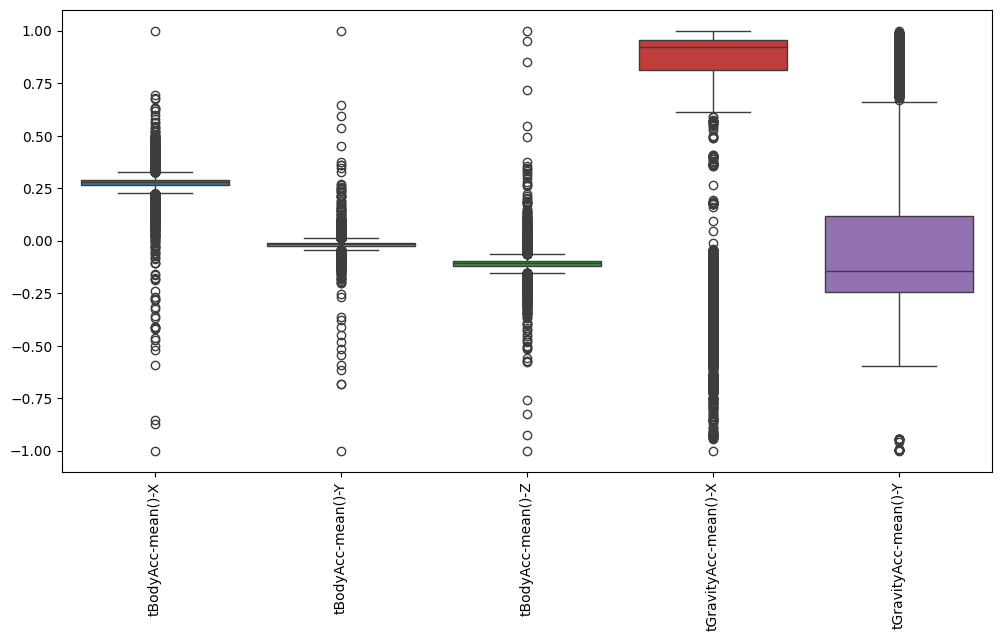

In [15]:
# 아니면 박스플롯

import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(12,6))
sns.boxplot(data=full_df[sample_cols])
plt.xticks(rotation=90)
plt.show()


워매 이게 뭐시당가...

In [16]:
# 일단 full_df에는 train & test가 일체형이기 때문에 모델 학습을 위한 split 필요

from sklearn.model_selection import train_test_split

X = full_df.drop(columns=['Activity'])
y = full_df['Activity']

X_train2, X_test2, y_train2, y_test2 = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)


In [17]:
# 기본 학습을 위한 앙상블 모델 (RF 혹은 로지스틱회귀)

from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier(
    n_estimators=200,
    max_depth=None,
    random_state=42,
    n_jobs=-1
)
rf.fit(X_train2, y_train2)


,n_estimators,200
,criterion,'gini'
,max_depth,None
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,'sqrt'
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,bootstrap,True
,oob_score,False


In [18]:
# 예측 정확도 확인

from sklearn.metrics import accuracy_score

pred = rf.predict(X_test2)
accuracy_score(y_test2, pred)


0.9810679611650486

* Random Forest는 대표적인 Classification 모델이고, 이 말인 즉 센서 feature를 사용해서 사람이 어떤 행동(자세)을 하고 있는지 매우 정확하게 분류 → 결과를 예측하는 모델링, 본 데이터 정제도가 높아서 기본 머신러닝으로도 높은 정확도가 나옴을 검증
* 다만 데이터 시각화, 특성 이해를 위해서는 노이즈 제거 및 구조 압축과 연산량 감소 작업이 필요하고 그걸 위해 차원 축소를 해야함.

c:\Users\obliv\AppData\Local\Programs\Python\Python310\lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


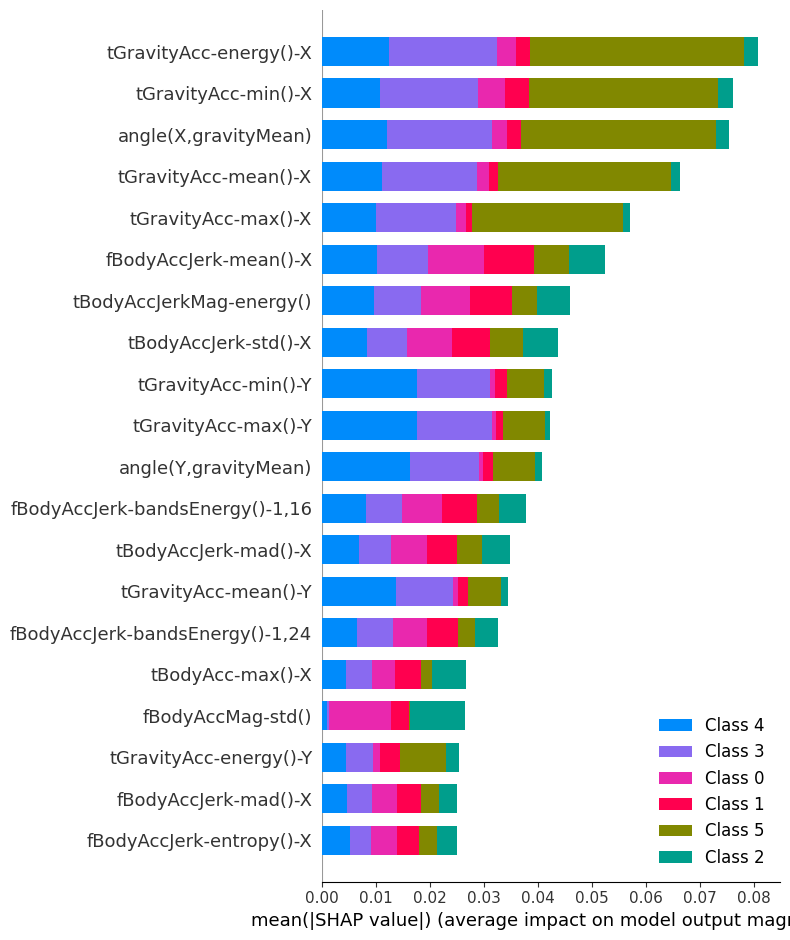

In [19]:
# feature Importance 확인을 위한 SHAP

import shap

explainer = shap.TreeExplainer(rf)
shap_values = explainer.shap_values(X_train2.sample(100))
shap.summary_plot(shap_values, X_train2.sample(100), plot_type="bar")



가장 상위 feat tGravityAcc-energy()-X 를 설명해보면,

중력 기반 가속도(gravity acceleration) X축에서 "energy" 통계 값
서 있는지/누워있는지/걷는지 등의 구분에 매우 큰 영향을 미침
특히 Standing / Laying 구분 시 중요도가 매우 높은 경향

Class 0(WALKING): 약간 영향
Class 1(UPSTAIRS): 약간 영향
Class 2(DOWNSTAIRS): 약간 영향
Class 3(SITTING): 4 대비 큰 영향
Class 4(STANDING): 0,1,2 대비 비교적 큰 영향
Class 5(LAYING): 아주 큰 영향


참고로 Class label 정의

| Class| 실제 Activity 이름  | 의미            |
| ---- | ------------------ | -------------- |
| 0    | WALKING            | 보통 속도로 걷기 |
| 1    | WALKING_UPSTAIRS   | 계단 오르기     |
| 2    | WALKING_DOWNSTAIRS | 계단 내려가기    |
| 3    | SITTING            | 앉아있기        |
| 4    | STANDING           | 서있기          |
| 5    | LAYING             | 누워있기        |

즉, 각 Class 별로 해당 feat이 어느 정도 영향을 미치는지 상위 features 별로 확인하는 SHAP

MD 문서를 살펴보면, 2.56초 단위로 하나의 'window'로 슬라이싱하고 128개 연속 측정값 포함
왜 128개 연속 측정값인가?

스마트폰 센서 주파수는 50Hz(초당 50회) → 2.56초 × 50 = 128개의 연속 측정값을 하나의 window로 슬라이싱 → 센서축(X,Y,Z)과 주파수 도메인, 파생신호 들의 특징 등을 합친 총 “561개의 센서 기반 특징을 적절히 차원축소해서, 이를 가지고 각 행동 클래스에 대한 확률(가중치)을 계산하여 이 사람이 어떤 행동을 하고 는지 판단한다.”

왜 차원축소를 해야하는가? → 561차원 전체를 그냥 분석하면 결과 도출이 어려움 → 그룹별 PCA를 통해 차원을 축소하고 분석용으로 차원 최종 통합 & 분석(PCA는 차원축소 툴이자 분석 툴)


In [20]:
# 차원 축소를 위해 full_df 에서 features, lable 분리 수행
features = full_df.drop(["Activity", "Subject"], axis=1)
labels = full_df["Activity"]


In [21]:
# 각 데이터별 스케일링(표준화) → 기초통계를 보면 알 수 있듯 센서별 값들이 널뛰기 하듯 뜀
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_scaled = scaler.fit_transform(features)



# 4. 차원축소 실험(PCA)

In [22]:
# PCA 객체 생성 & 2차원 PCA 준비
from sklearn.decomposition import PCA

pca_2d = PCA(n_components=2)
X_pca_2 = pca_2d.fit_transform(X_scaled)


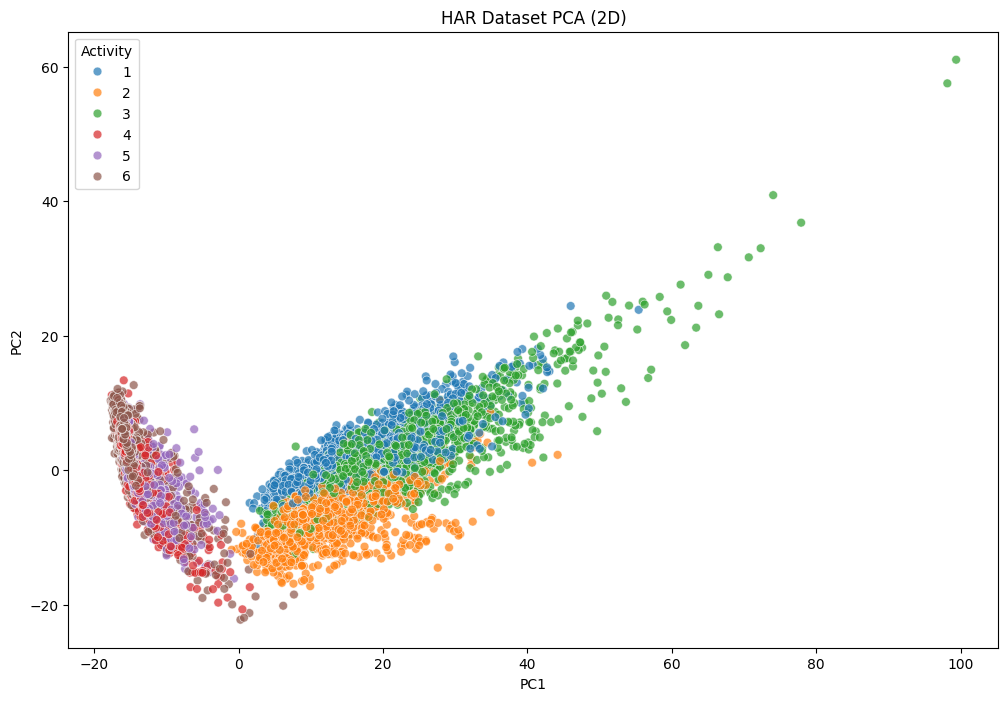

In [ ]:
pca_2d = PCA(n_components=2)
X_pca_2 = pca_2d.fit_transform(X_scaled)

pca_df = pd.DataFrame({
    "PC1": X_pca_2[:, 0],
    "PC2": X_pca_2[:, 1],
    "Activity": y.values         # y_train 아님!
})

palette = sns.color_palette("tab10", 6)

plt.figure(figsize=(12, 8))
sns.scatterplot(
    x="PC1",
    y="PC2",
    hue="Activity",
    palette=palette,
    data=pca_df,
    s=40,
    alpha=0.7
)
plt.title("HAR Dataset PCA (2D)")
plt.legend(title="Activity", loc="best")
plt.show()



In [24]:
pca_df.head()

,PC1,PC2,Activity
0,-16.380980,1.995083,5
1,-15.582173,1.182594,5
2,-15.423989,2.243166,5
3,-15.647807,3.762882,5
4,-15.842320,4.438897,5


In [25]:
# 2D 기준으로 얼마만큼의 정보만 반영된 상태인지 ratio 확인
pca_2d.explained_variance_ratio_


array([0.50738221, 0.06239186])

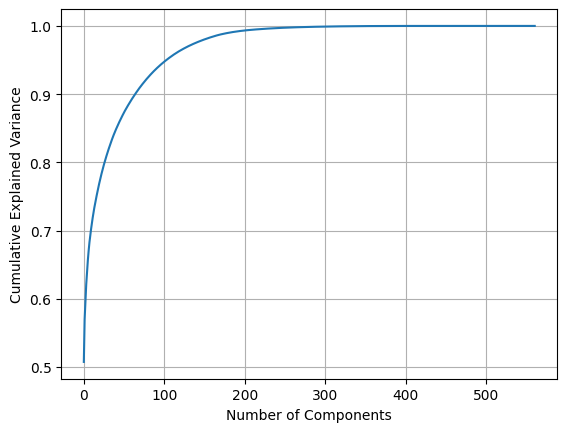

In [26]:
# 전체 PC 누적기여도_ 몇차원까지 줄여야 원래 성능으로 유지하는지 확인

pca_full = PCA().fit(X_scaled)
plt.plot(np.cumsum(pca_full.explained_variance_ratio_))
plt.xlabel("Number of Components")
plt.ylabel("Cumulative Explained Variance")
plt.grid()
plt.show()


한 100~200 사이(사실 100만 넘어도 90% 이상은 설명 가능)로 축소하면 원래 성능에 가까움

In [27]:
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import StandardScaler

# 1) 스케일링
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_train)

# 2) PCA 2D 축소
pca_2 = PCA(n_components=2)
X_pca2 = pca_2.fit_transform(X_scaled)

# 3) 데이터 분리
X_tr, X_te, y_tr, y_te = train_test_split(X_pca2, y_train["Activity"], test_size=0.2)

# 4) 모델
clf = RandomForestClassifier(n_estimators=300)
clf.fit(X_tr, y_tr)
pred = clf.predict(X_te)

# 5) 정확도 출력
print("PCA 2D Accuracy:", accuracy_score(y_te, pred))


PCA 2D Accuracy: 0.5696804894629504


2차원으로 축소한 데이터는 단지 시각화를 위해 만든 것이고 모델 설명력(예측력)을 보이기에는 좋지 않음
그럼 몇차원까지 해야 모델 설명력을 회복하는지 확인 필요

In [28]:
from sklearn.decomposition import PCA
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
import pandas as pd

# 성능을 저장할 리스트
results = []

# 실험할 PCA 차원 목록
dims = [2, 5, 10, 20, 30, 40, 50, 75, 100, 120, 150, 200, 300, 561]  # 561=원본 그대로

# Train/Test split
X_train_split, X_test_split, y_train_split, y_test_split = train_test_split(
    X_scaled, y_train["Activity"], test_size=0.2, random_state=42
)

for d in dims:
    print(f"\n=== PCA {d}차원으로 실험 중 ===")

    # PCA 적용
    pca = PCA(n_components=d)
    X_train_pca = pca.fit_transform(X_train_split)
    X_test_pca  = pca.transform(X_test_split)

    # 랜덤포레스트 학습
    rf = RandomForestClassifier(n_estimators=200, random_state=42)
    rf.fit(X_train_pca, y_train_split)

    # 예측 및 정확도 계산
    y_pred = rf.predict(X_test_pca)
    acc = accuracy_score(y_test_split, y_pred)

    results.append({
        "PCA_Dim": d,
        "Accuracy": acc
    })

# 결과 DataFrame 정리
results_df = pd.DataFrame(results)
results_df



=== PCA 2차원으로 실험 중 ===

=== PCA 5차원으로 실험 중 ===

=== PCA 10차원으로 실험 중 ===

=== PCA 20차원으로 실험 중 ===

=== PCA 30차원으로 실험 중 ===

=== PCA 40차원으로 실험 중 ===

=== PCA 50차원으로 실험 중 ===

=== PCA 75차원으로 실험 중 ===

=== PCA 100차원으로 실험 중 ===

=== PCA 120차원으로 실험 중 ===

=== PCA 150차원으로 실험 중 ===

=== PCA 200차원으로 실험 중 ===

=== PCA 300차원으로 실험 중 ===

=== PCA 561차원으로 실험 중 ===


,PCA_Dim,Accuracy
0,2,0.533651
1,5,0.838205
2,10,0.889191
3,20,0.907546
4,30,0.926581
5,40,0.923861
6,50,0.932699
7,75,0.925901
8,100,0.938137
9,120,0.944256


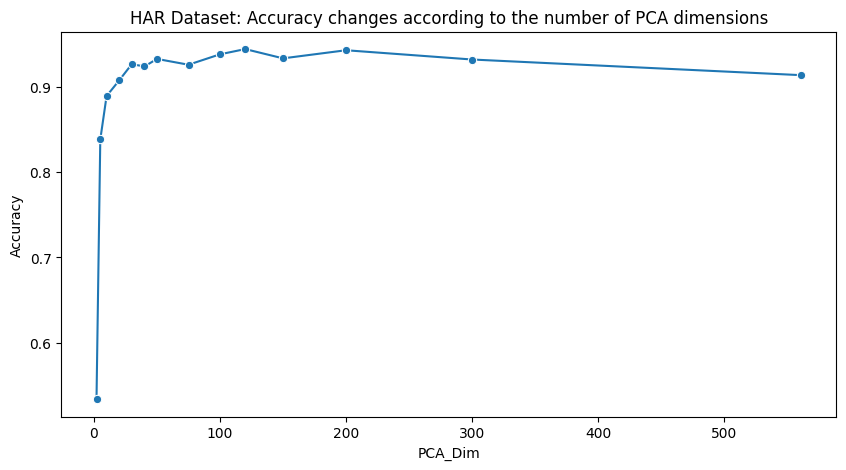

In [29]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 5))
sns.lineplot(data=results_df, x="PCA_Dim", y="Accuracy", marker="o")
plt.title("HAR Dataset: Accuracy changes according to the number of PCA dimensions")
plt.show()


* R/Q 에서 100~120회차쯤에 Accuracy가 원래 데이터셋만큼 올라갈 것이라 생각했는데 그 전에 거의 복구하고 심지어 100 넘는 순간부터 Accuracy가 흔들리기 시작, 561차원에는 아예 떨어짐
* 그렇다면 처음 앙상블에서 나온 98% 정확도는 무엇인가?
→ 학습 환경과 테스트 환경이 유사한 원본 HAR 데이터의 train:test(7:3) 를 사용해서 거기에 적합성을 띔
→ 현재 차원별 RF는 임의로 train/test를 split 하면서 subject가 섞이고, 패턴이 사람별로 달라지면서 그에 따라 난이도가 높아짐 & RF는 고차원일수록 overfitting & variance 증가로 일반화 성능 떨어진다고 함
∴ 처음 만든 데이터로 한 건 일종의 학원 모의고사, 현재 다시 차원별로 테스트해본 것은 6모 같은 것

그럼 이제는 머신러닝 모델별로, 차원별로 어떻게 성능 차이가 나는지 접었다 폈다(?) 하면서 확인해볼 것

# 5. 차원별 ML 모델 성능 비교

In [30]:
# 모델 싹다 불러오기(베이스라인 ML 중심)

import pandas as pd
import numpy as np
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
import matplotlib.pyplot as plt


In [31]:
# 데이터 준비(학원 모의고사 버전으로)

# X, y 분리
X = full_df.drop(columns=["Activity"])
y = full_df["Activity"]

# Standard scaling
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Train/Test split
X_train, X_test, y_train, y_test = train_test_split(
    X_scaled, y, test_size=0.2, random_state=42, stratify=y
)



In [32]:
# 비교할 모델들 파라미터 정의

models = {
    "RandomForest": RandomForestClassifier(n_estimators=200, random_state=42, n_jobs=-1),
    "LogisticRegression": LogisticRegression(max_iter=2000, n_jobs=-1),
    "KNN": KNeighborsClassifier(n_neighbors=7),
    "SVM_RBF": SVC(kernel="rbf")
}


In [33]:
# 모델별로 테스트할 PCA 차원 목록

pca_dims = [2, 5, 10, 20, 30, 40, 50, 75, 100, 120, 150, 200, 300, 561]


In [34]:
# 모델 * 차원별 자동 성능 측정

results = []

for dim in pca_dims:
    print(f"\n▶ Testing PCA = {dim} dimensions")

    # PCA 적용
    pca = PCA(n_components=dim)
    X_train_p = pca.fit_transform(X_train)
    X_test_p = pca.transform(X_test)

    for model_name, model in models.items():
        # 모델 학습
        model.fit(X_train_p, y_train)

        # 예측 및 정확도
        pred = model.predict(X_test_p)
        acc = accuracy_score(y_test, pred)

        results.append([dim, model_name, acc])
        print(f"   {model_name}: {acc:.4f}")

# 결과 DataFrame
results_df = pd.DataFrame(results, columns=["PCA_Dim", "Model", "Accuracy"])
results_df



▶ Testing PCA = 2 dimensions
   RandomForest: 0.5330
   LogisticRegression: 0.5636
   KNN: 0.5592
   SVM_RBF: 0.5723

▶ Testing PCA = 5 dimensions
   RandomForest: 0.8335
   LogisticRegression: 0.8189
   KNN: 0.8165
   SVM_RBF: 0.8277

▶ Testing PCA = 10 dimensions
   RandomForest: 0.8772
   LogisticRegression: 0.8631
   KNN: 0.8796
   SVM_RBF: 0.8830

▶ Testing PCA = 20 dimensions
   RandomForest: 0.9136
   LogisticRegression: 0.9097
   KNN: 0.9039
   SVM_RBF: 0.9218

▶ Testing PCA = 30 dimensions
   RandomForest: 0.9282
   LogisticRegression: 0.9345
   KNN: 0.9282
   SVM_RBF: 0.9442

▶ Testing PCA = 40 dimensions
   RandomForest: 0.9330
   LogisticRegression: 0.9427
   KNN: 0.9325
   SVM_RBF: 0.9524

▶ Testing PCA = 50 dimensions
   RandomForest: 0.9340
   LogisticRegression: 0.9568
   KNN: 0.9374
   SVM_RBF: 0.9578

▶ Testing PCA = 75 dimensions
   RandomForest: 0.9364
   LogisticRegression: 0.9602
   KNN: 0.9529
   SVM_RBF: 0.9602

▶ Testing PCA = 100 dimensions
   RandomForest: 0

,PCA_Dim,Model,Accuracy
0,2,RandomForest,0.533010
1,2,LogisticRegression,0.563592
2,2,KNN,0.559223
3,2,SVM_RBF,0.572330
4,5,RandomForest,0.833495
5,5,LogisticRegression,0.818932
6,5,KNN,0.816505
7,5,SVM_RBF,0.827670
8,10,RandomForest,0.877184
9,10,LogisticRegression,0.863107


In [35]:
# 성능 테이블 확인

results_df.sort_values(["Model", "PCA_Dim"])


,PCA_Dim,Model,Accuracy
2,2,KNN,0.559223
6,5,KNN,0.816505
10,10,KNN,0.879612
14,20,KNN,0.903883
18,30,KNN,0.928155
22,40,KNN,0.932524
26,50,KNN,0.937379
30,75,KNN,0.952913
34,100,KNN,0.959223
38,120,KNN,0.960680


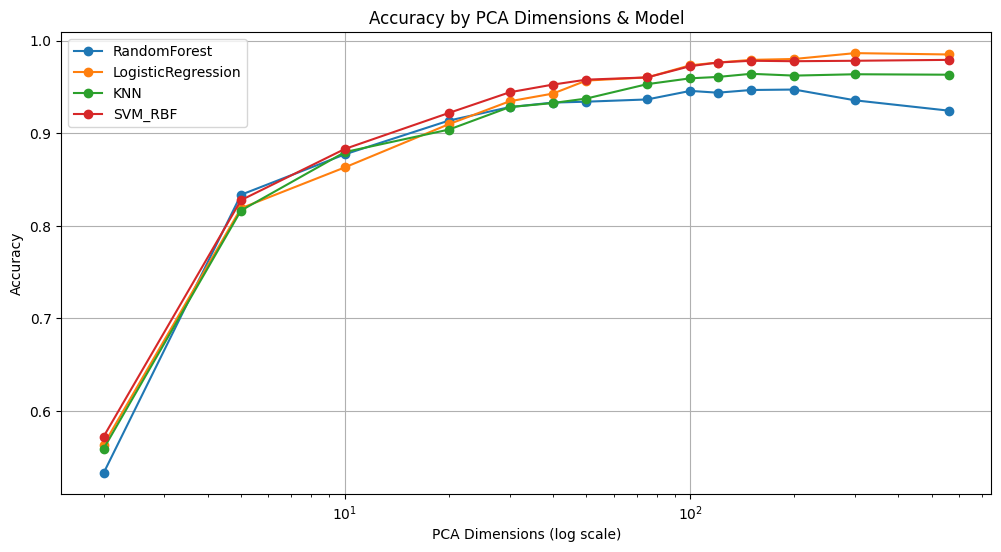

In [36]:
# 모델별 정확도 시각화
plt.figure(figsize=(12,6))

for model_name in models.keys():
    subset = results_df[results_df["Model"] == model_name]
    plt.plot(subset["PCA_Dim"], subset["Accuracy"], marker='o', label=model_name)

plt.xscale("log")
plt.xlabel("PCA Dimensions (log scale)")
plt.ylabel("Accuracy")
plt.title("Accuracy by PCA Dimensions & Model")
plt.legend()
plt.grid(True)
plt.show()



====== PCA 2차원 ======
RandomForest Accuracy = 0.5442


c:\Users\obliv\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_logistic.py:473: ConvergenceWarning: lbfgs failed to converge after 300 iteration(s) (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT

Increase the number of iterations to improve the convergence (max_iter=300).
You might also want to scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression Accuracy = 0.5621
KNN Accuracy = 0.5534
SVM_RBF Accuracy = 0.5728
XGBoost Accuracy = 0.5306
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000658 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 510
[LightGBM] [Info] Number of data points in the train set: 8239, number of used features: 2
[LightGBM] [Info] Start training from score -1.788246
[LightGBM] [Info] Start training from score -1.897808
[LightGBM] [Info] Start training from score -1.991096
[LightGBM] [Info] Start training from score -1.757518
[LightGBM] [Info] Start training from score -1.686885
[LightGBM] [Info] Start training from score -1.667403


c:\Users\obliv\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(


LightGBM Accuracy = 0.5364
CatBoost Accuracy = 0.5786

====== PCA 5차원 ======
RandomForest Accuracy = 0.8316


c:\Users\obliv\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_logistic.py:473: ConvergenceWarning: lbfgs failed to converge after 300 iteration(s) (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT

Increase the number of iterations to improve the convergence (max_iter=300).
You might also want to scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression Accuracy = 0.8165
KNN Accuracy = 0.8117
SVM_RBF Accuracy = 0.8282
XGBoost Accuracy = 0.8267
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000300 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 1275
[LightGBM] [Info] Number of data points in the train set: 8239, number of used features: 5
[LightGBM] [Info] Start training from score -1.788246
[LightGBM] [Info] Start training from score -1.897808
[LightGBM] [Info] Start training from score -1.991096
[LightGBM] [Info] Start training from score -1.757518
[LightGBM] [Info] Start training from score -1.686885
[LightGBM] [Info] Start training from score -1.667403


c:\Users\obliv\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(


LightGBM Accuracy = 0.8238
CatBoost Accuracy = 0.8325

====== PCA 10차원 ======
RandomForest Accuracy = 0.8835


c:\Users\obliv\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_logistic.py:473: ConvergenceWarning: lbfgs failed to converge after 300 iteration(s) (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT

Increase the number of iterations to improve the convergence (max_iter=300).
You might also want to scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression Accuracy = 0.8631
KNN Accuracy = 0.8786
SVM_RBF Accuracy = 0.8845
XGBoost Accuracy = 0.8830
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000217 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 2550
[LightGBM] [Info] Number of data points in the train set: 8239, number of used features: 10
[LightGBM] [Info] Start training from score -1.788246
[LightGBM] [Info] Start training from score -1.897808
[LightGBM] [Info] Start training from score -1.991096
[LightGBM] [Info] Start training from score -1.757518
[LightGBM] [Info] Start training from score -1.686885
[LightGBM] [Info] Start training from score -1.667403
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive

c:\Users\obliv\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(


LightGBM Accuracy = 0.8850
CatBoost Accuracy = 0.8767

====== PCA 20차원 ======
RandomForest Accuracy = 0.9087


c:\Users\obliv\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_logistic.py:473: ConvergenceWarning: lbfgs failed to converge after 300 iteration(s) (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT

Increase the number of iterations to improve the convergence (max_iter=300).
You might also want to scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression Accuracy = 0.9107
KNN Accuracy = 0.9078
SVM_RBF Accuracy = 0.9214
XGBoost Accuracy = 0.9175
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000543 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 5100
[LightGBM] [Info] Number of data points in the train set: 8239, number of used features: 20
[LightGBM] [Info] Start training from score -1.788246
[LightGBM] [Info] Start training from score -1.897808
[LightGBM] [Info] Start training from score -1.991096
[LightGBM] [Info] Start training from score -1.757518
[LightGBM] [Info] Start training from score -1.686885
[LightGBM] [Info] Start training from score -1.667403
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive

c:\Users\obliv\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(


LightGBM Accuracy = 0.9194
CatBoost Accuracy = 0.9073

====== PCA 30차원 ======
RandomForest Accuracy = 0.9233


c:\Users\obliv\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_logistic.py:473: ConvergenceWarning: lbfgs failed to converge after 300 iteration(s) (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT

Increase the number of iterations to improve the convergence (max_iter=300).
You might also want to scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression Accuracy = 0.9354
KNN Accuracy = 0.9316
SVM_RBF Accuracy = 0.9442
XGBoost Accuracy = 0.9413
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.001434 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 7650
[LightGBM] [Info] Number of data points in the train set: 8239, number of used features: 30
[LightGBM] [Info] Start training from score -1.788246
[LightGBM] [Info] Start training from score -1.897808
[LightGBM] [Info] Start training from score -1.991096
[LightGBM] [Info] Start training from score -1.757518
[LightGBM] [Info] Start training from score -1.686885
[LightGBM] [Info] Start training from score -1.667403
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive

c:\Users\obliv\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(


LightGBM Accuracy = 0.9379
CatBoost Accuracy = 0.9286

====== PCA 40차원 ======
RandomForest Accuracy = 0.9364


c:\Users\obliv\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_logistic.py:473: ConvergenceWarning: lbfgs failed to converge after 300 iteration(s) (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT

Increase the number of iterations to improve the convergence (max_iter=300).
You might also want to scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression Accuracy = 0.9422
KNN Accuracy = 0.9311
SVM_RBF Accuracy = 0.9524
XGBoost Accuracy = 0.9510
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000836 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 10200
[LightGBM] [Info] Number of data points in the train set: 8239, number of used features: 40
[LightGBM] [Info] Start training from score -1.788246
[LightGBM] [Info] Start training from score -1.897808
[LightGBM] [Info] Start training from score -1.991096
[LightGBM] [Info] Start training from score -1.757518
[LightGBM] [Info] Start training from score -1.686885
[LightGBM] [Info] Start training from score -1.667403
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positiv

c:\Users\obliv\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(


LightGBM Accuracy = 0.9510
CatBoost Accuracy = 0.9350

====== PCA 50차원 ======
RandomForest Accuracy = 0.9330


c:\Users\obliv\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_logistic.py:473: ConvergenceWarning: lbfgs failed to converge after 300 iteration(s) (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT

Increase the number of iterations to improve the convergence (max_iter=300).
You might also want to scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression Accuracy = 0.9529
KNN Accuracy = 0.9354
SVM_RBF Accuracy = 0.9573
XGBoost Accuracy = 0.9500
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.001020 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 12750
[LightGBM] [Info] Number of data points in the train set: 8239, number of used features: 50
[LightGBM] [Info] Start training from score -1.788246
[LightGBM] [Info] Start training from score -1.897808
[LightGBM] [Info] Start training from score -1.991096
[LightGBM] [Info] Start training from score -1.757518
[LightGBM] [Info] Start training from score -1.686885
[LightGBM] [Info] Start training from score -1.667403
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positiv

c:\Users\obliv\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(


LightGBM Accuracy = 0.9544
CatBoost Accuracy = 0.9330

====== PCA 75차원 ======
RandomForest Accuracy = 0.9398


c:\Users\obliv\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_logistic.py:473: ConvergenceWarning: lbfgs failed to converge after 300 iteration(s) (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT

Increase the number of iterations to improve the convergence (max_iter=300).
You might also want to scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression Accuracy = 0.9583
KNN Accuracy = 0.9524
SVM_RBF Accuracy = 0.9602
XGBoost Accuracy = 0.9549
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.001789 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 19125
[LightGBM] [Info] Number of data points in the train set: 8239, number of used features: 75
[LightGBM] [Info] Start training from score -1.788246
[LightGBM] [Info] Start training from score -1.897808
[LightGBM] [Info] Start training from score -1.991096
[LightGBM] [Info] Start training from score -1.757518
[LightGBM] [Info] Start training from score -1.686885
[LightGBM] [Info] Start training from score -1.667403
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positiv

c:\Users\obliv\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(


LightGBM Accuracy = 0.9583
CatBoost Accuracy = 0.9403

====== PCA 100차원 ======
RandomForest Accuracy = 0.9442
LogisticRegression Accuracy = 0.9723
KNN Accuracy = 0.9602
SVM_RBF Accuracy = 0.9733
XGBoost Accuracy = 0.9670
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.002014 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 25500
[LightGBM] [Info] Number of data points in the train set: 8239, number of used features: 100
[LightGBM] [Info] Start training from score -1.788246
[LightGBM] [Info] Start training from score -1.897808
[LightGBM] [Info] Start training from score -1.991096
[LightGBM] [Info] Start training from score -1.757518
[LightGBM] [Info] Start training from score -1.686885
[LightGBM] [Info] Start training from score -1.667403
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [War

c:\Users\obliv\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(


LightGBM Accuracy = 0.9641
CatBoost Accuracy = 0.9451

====== PCA 120차원 ======
RandomForest Accuracy = 0.9485
LogisticRegression Accuracy = 0.9767
KNN Accuracy = 0.9583
SVM_RBF Accuracy = 0.9772
XGBoost Accuracy = 0.9670
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.002534 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 30600
[LightGBM] [Info] Number of data points in the train set: 8239, number of used features: 120
[LightGBM] [Info] Start training from score -1.788246
[LightGBM] [Info] Start training from score -1.897808
[LightGBM] [Info] Start training from score -1.991096
[LightGBM] [Info] Start training from score -1.757518
[LightGBM] [Info] Start training from score -1.686885
[LightGBM] [Info] Start training from score -1.667403
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [War

c:\Users\obliv\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(


LightGBM Accuracy = 0.9641
CatBoost Accuracy = 0.9451

====== PCA 150차원 ======
RandomForest Accuracy = 0.9481
LogisticRegression Accuracy = 0.9791
KNN Accuracy = 0.9587
SVM_RBF Accuracy = 0.9782
XGBoost Accuracy = 0.9665
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.005154 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 38250
[LightGBM] [Info] Number of data points in the train set: 8239, number of used features: 150
[LightGBM] [Info] Start training from score -1.788246
[LightGBM] [Info] Start training from score -1.897808
[LightGBM] [Info] Start training from score -1.991096
[LightGBM] [Info] Start training from score -1.757518
[LightGBM] [Info] Start training from score -1.686885
[LightGBM] [Info] Start training from score -1.667403
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [War

c:\Users\obliv\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(


LightGBM Accuracy = 0.9665
CatBoost Accuracy = 0.9447

====== PCA 200차원 ======
RandomForest Accuracy = 0.9461
LogisticRegression Accuracy = 0.9801
KNN Accuracy = 0.9587
SVM_RBF Accuracy = 0.9767
XGBoost Accuracy = 0.9718
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.004784 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 51000
[LightGBM] [Info] Number of data points in the train set: 8239, number of used features: 200
[LightGBM] [Info] Start training from score -1.788246
[LightGBM] [Info] Start training from score -1.897808
[LightGBM] [Info] Start training from score -1.991096
[LightGBM] [Info] Start training from score -1.757518
[LightGBM] [Info] Start training from score -1.686885
[LightGBM] [Info] Start training from score -1.667403
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [War

c:\Users\obliv\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(


LightGBM Accuracy = 0.9675
CatBoost Accuracy = 0.9495

====== PCA 300차원 ======
RandomForest Accuracy = 0.9383
LogisticRegression Accuracy = 0.9854
KNN Accuracy = 0.9621
SVM_RBF Accuracy = 0.9777
XGBoost Accuracy = 0.9728
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.010023 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 76500
[LightGBM] [Info] Number of data points in the train set: 8239, number of used features: 300
[LightGBM] [Info] Start training from score -1.788246
[LightGBM] [Info] Start training from score -1.897808
[LightGBM] [Info] Start training from score -1.991096
[LightGBM] [Info] Start training from score -1.757518
[LightGBM] [Info] Start training from score -1.686885
[LightGBM] [Info] Start training from score -1.667403
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [War

c:\Users\obliv\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(


LightGBM Accuracy = 0.9718
CatBoost Accuracy = 0.9466

====== PCA 561차원 ======
RandomForest Accuracy = 0.9223
LogisticRegression Accuracy = 0.9845
KNN Accuracy = 0.9626
SVM_RBF Accuracy = 0.9786
XGBoost Accuracy = 0.9714
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.015166 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 143055
[LightGBM] [Info] Number of data points in the train set: 8239, number of used features: 561
[LightGBM] [Info] Start training from score -1.788246
[LightGBM] [Info] Start training from score -1.897808
[LightGBM] [Info] Start training from score -1.991096
[LightGBM] [Info] Start training from score -1.757518
[LightGBM] [Info] Start training from score -1.686885
[LightGBM] [Info] Start training from score -1.667403
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Wa

c:\Users\obliv\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(


LightGBM Accuracy = 0.9718
CatBoost Accuracy = 0.9476


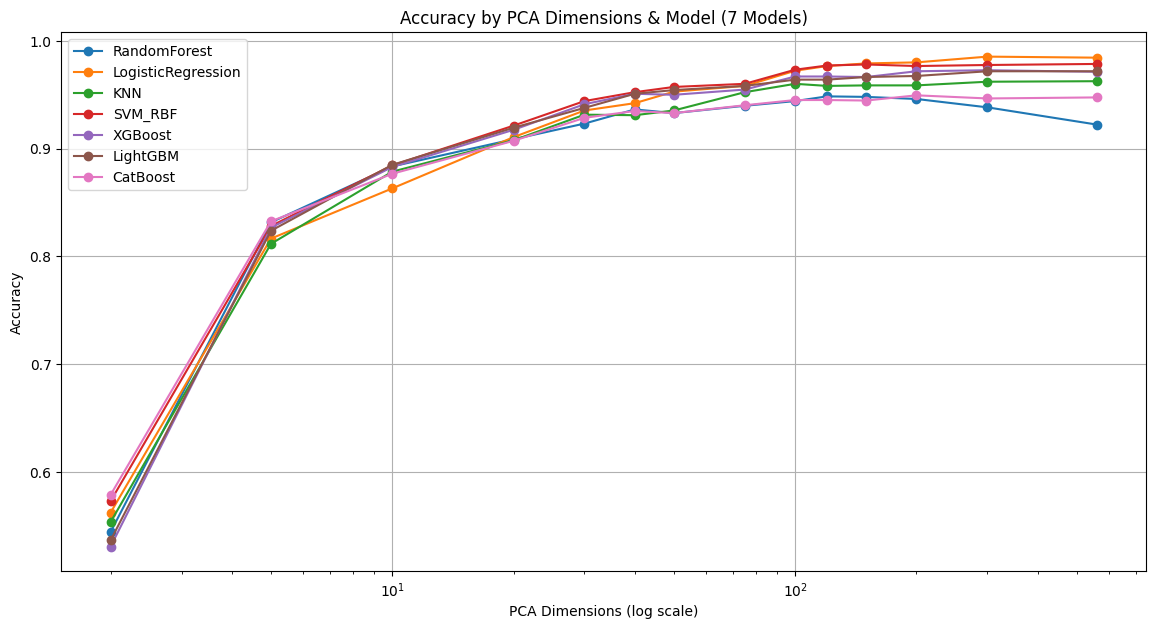

In [37]:
# 트리모델 강화 버전으로 재비교

import numpy as np
import pandas as pd
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import LabelEncoder

# 기존 모델들
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC

# Boosting 계열 모델들
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
from catboost import CatBoostClassifier

import matplotlib.pyplot as plt


# ------------------------------------------
# 1) 데이터 준비
# ------------------------------------------
X = full_df.drop(["Activity", "Subject"], axis=1)
le = LabelEncoder()
y = le.fit_transform(full_df["Activity"]) # boosting 계열 정수형 라벨 이슈 해결용

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# 테스트셋 분리 (항상 고정)
X_train_full, X_test_full, y_train, y_test = train_test_split(
    X_scaled, y, test_size=0.2, random_state=42, stratify=y
)

# 테스트 차원 리스트
pca_dims = [2, 5, 10, 20, 30, 40, 50, 75, 100, 120, 150, 200, 300, 561]


# ------------------------------------------
# 2) 사용할 모델 정의
# ------------------------------------------
models = {
    "RandomForest": RandomForestClassifier(n_estimators=300, random_state=42),
    "LogisticRegression": LogisticRegression(max_iter=300),
    "KNN": KNeighborsClassifier(n_neighbors=5),
    "SVM_RBF": SVC(kernel='rbf'),

    # Boosting 3종
    "XGBoost": XGBClassifier(
        n_estimators=300, learning_rate=0.05, max_depth=6,
        subsample=0.8, colsample_bytree=0.8, eval_metric="mlogloss"
    ),

    "LightGBM": LGBMClassifier(
        n_estimators=300, learning_rate=0.05, num_leaves=64
    ),

    "CatBoost": CatBoostClassifier(
        iterations=300, learning_rate=0.05, depth=6, verbose=False
    ),
}


# ------------------------------------------
# 3) 결과 저장용 딕셔너리
# ------------------------------------------
results = {model_name: [] for model_name in models.keys()}


# ------------------------------------------
# 4) PCA 차원별 학습 반복
# ------------------------------------------
for dim in pca_dims:
    pca = PCA(n_components=dim)
    X_train_pca = pca.fit_transform(X_train_full)
    X_test_pca = pca.transform(X_test_full)

    print(f"\n====== PCA {dim}차원 ======")

    for model_name, model in models.items():

        # CatBoost는 입력이 float64여야 오류가 없어서 변환
        X_train_temp = X_train_pca.astype(np.float32)
        X_test_temp = X_test_pca.astype(np.float32)

        model.fit(X_train_temp, y_train)
        preds = model.predict(X_test_temp)

        acc = accuracy_score(y_test, preds)
        results[model_name].append(acc)

        print(f"{model_name} Accuracy = {acc:.4f}")


# ------------------------------------------
# 5) 그래프 시각화
# ------------------------------------------
plt.figure(figsize=(14, 7))

for model_name, acc_list in results.items():
    plt.plot(pca_dims, acc_list, marker='o', label=model_name)

plt.xscale("log")
plt.xlabel("PCA Dimensions (log scale)")
plt.ylabel("Accuracy")
plt.title("Accuracy by PCA Dimensions & Model (7 Models)")
plt.legend()
plt.grid(True)
plt.show()


In [38]:
# 성능확인용 시각화그래프
# pca_dims = [2, 5, 10, 20, 30, 40, 50, 75, 100, 120, 150, 200, 300, 561]

df_results = pd.DataFrame(results, index=pca_dims)
df_results.index.name = "PCA_Dim"
df_results

df_sorted = df_results.T.sort_values(by=561, ascending=False).T
df_sorted

df_results.style.background_gradient(cmap="coolwarm")



,RandomForest,LogisticRegression,KNN,SVM_RBF,XGBoost,LightGBM,CatBoost
PCA_Dim,,,,,,,
2,0.544175,0.562136,0.553398,0.572816,0.530583,0.536408,0.578641
5,0.831553,0.816505,0.811650,0.828155,0.826699,0.823786,0.832524
10,0.883495,0.863107,0.878641,0.884466,0.883010,0.884951,0.876699
20,0.908738,0.910680,0.907767,0.921359,0.917476,0.919417,0.907282
30,0.923301,0.935437,0.931553,0.944175,0.941262,0.937864,0.928641
40,0.936408,0.942233,0.931068,0.952427,0.950971,0.950971,0.934951
50,0.933010,0.952913,0.935437,0.957282,0.950000,0.954369,0.933010
75,0.939806,0.958252,0.952427,0.960194,0.954854,0.958252,0.940291
100,0.944175,0.972330,0.960194,0.973301,0.966990,0.964078,0.945146


데이터 구조 자체가 PCA를 통해 선형적으로 정리되었을 때 가장 효율적으로 패턴을 잡는 모델이 Logistic Regression이다. → 로지스틱 회귀가 가장 HAR 원본 데이터에서 최적 모델이라는 것은 아니다.
원래의 561차원 데이터 기준으로 보았을때는 부스트 계열이나 SVM이 가장 성능이 좋음

# 6. UMAP & t-SNE 시각화

In [39]:
# UMAP 시각화

# 데이터 준비
X = full_df.drop(columns=["Subject", "Activity"])
y = full_df["Activity"]


c:\Users\obliv\AppData\Local\Programs\Python\Python310\lib\site-packages\umap\umap_.py:1952: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(


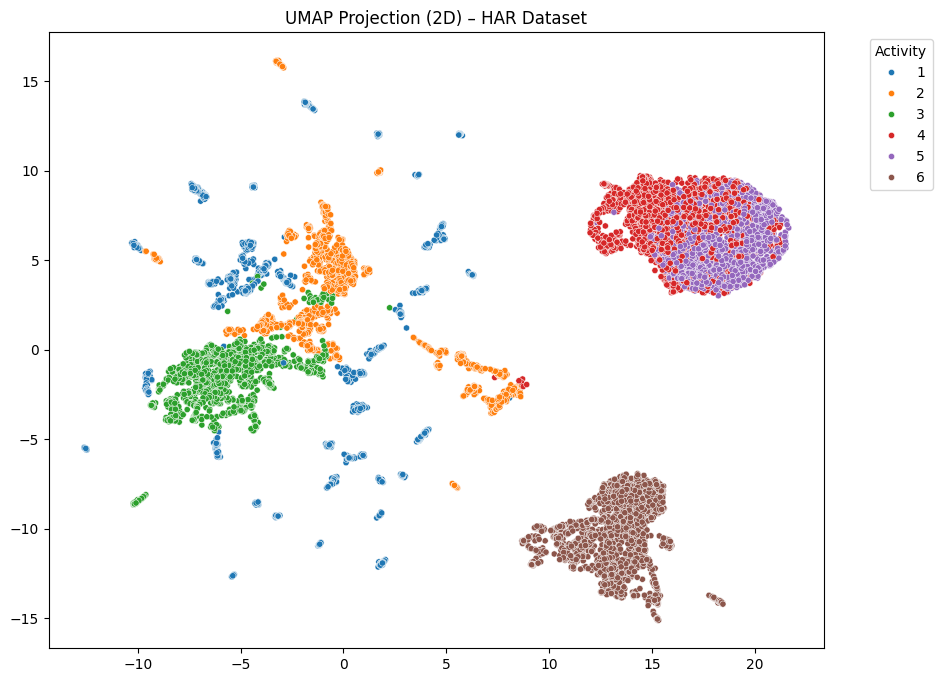

In [44]:
# UMAP 2D 세팅, 모델 피팅

import umap.umap_ as umap
import matplotlib.pyplot as plt
import seaborn as sns

# UMAP 2D
umap_2d = umap.UMAP(
    n_neighbors=15,
    min_dist=0.3,
    spread=1.5,
    n_components=2,
    metric='euclidean',
    random_state=42
)

X_umap_2d = umap_2d.fit_transform(X)

# 시각화
plt.figure(figsize=(10, 8))
sns.scatterplot(
    x=X_umap_2d[:, 0],
    y=X_umap_2d[:, 1],
    hue=y,
    palette="tab10",
    s=20
)
plt.title("UMAP Projection (2D) – HAR Dataset")
plt.legend(title="Activity", bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()


[t-SNE] Computing 91 nearest neighbors...
[t-SNE] Indexed 10299 samples in 0.002s...
[t-SNE] Computed neighbors for 10299 samples in 0.211s...
[t-SNE] Computed conditional probabilities for sample 1000 / 10299
[t-SNE] Computed conditional probabilities for sample 2000 / 10299
[t-SNE] Computed conditional probabilities for sample 3000 / 10299
[t-SNE] Computed conditional probabilities for sample 4000 / 10299
[t-SNE] Computed conditional probabilities for sample 5000 / 10299
[t-SNE] Computed conditional probabilities for sample 6000 / 10299
[t-SNE] Computed conditional probabilities for sample 7000 / 10299
[t-SNE] Computed conditional probabilities for sample 8000 / 10299
[t-SNE] Computed conditional probabilities for sample 9000 / 10299
[t-SNE] Computed conditional probabilities for sample 10000 / 10299
[t-SNE] Computed conditional probabilities for sample 10299 / 10299
[t-SNE] Mean sigma: 1.257765
[t-SNE] KL divergence after 250 iterations with early exaggeration: 81.983337
[t-SNE] KL 

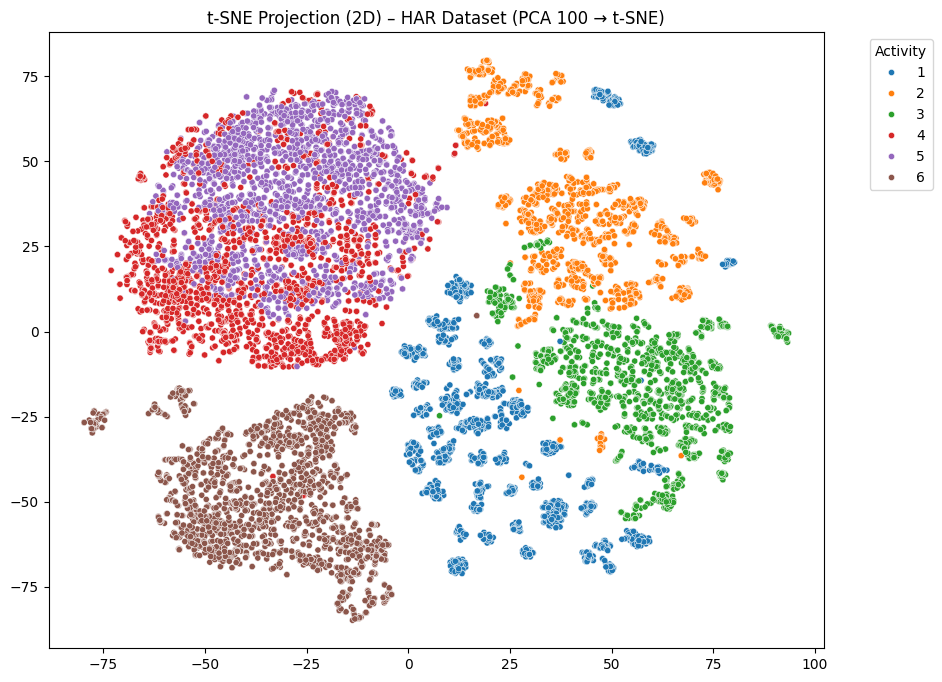

In [46]:
# t-SNE 차원축소

from sklearn.manifold import TSNE
from sklearn.decomposition import PCA

# t-SNE 전처리: PCA로 100차원 축소
pca_100 = PCA(n_components=100)
X_pca_100 = pca_100.fit_transform(X)

# t-SNE 2D
tsne_2d = TSNE(
    n_components=2,
    perplexity=30,
    learning_rate=200,
    max_iter=1000,
    metric="euclidean",
    random_state=42,
    verbose=1
)

X_tsne_2d = tsne_2d.fit_transform(X_pca_100)

# 시각화
plt.figure(figsize=(10, 8))
sns.scatterplot(
    x=X_tsne_2d[:, 0],
    y=X_tsne_2d[:, 1],
    hue=y,
    palette="tab10",
    s=20
)
plt.title("t-SNE Projection (2D) – HAR Dataset (PCA 100 → t-SNE)")
plt.legend(title="Activity", bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()


In [ ]:
# 센서 파형 확인코드 - body_acc + body_gyro의 magnitude를 만들어서 Activity별 평균 파형을 그려보는 예시

# 1) y (Activity) 전체 불러오기 – train/test 합치기
y_train = pd.read_csv(
    "UCI-HAR Dataset/train/y_train.txt",
    sep=r"\s+", header=None, names=["Activity"]
)
y_test = pd.read_csv(
    "UCI-HAR Dataset/test/y_test.txt",
    sep=r"\s+", header=None, names=["Activity"]
)
y_all = pd.concat([y_train, y_test], axis=0).reset_index(drop=True)

print(y_all['Activity'].value_counts().sort_index())

# 2) Inertial Signals 로딩 함수
def load_signal(split, signal_name):
    path = f"UCI-HAR Dataset/{split}/Inertial Signals/{signal_name}"
    # 각 파일: (n_samples, 128) 형태의 공백구분 숫자
    return np.loadtxt(path)

# 3) body_acc, body_gyro 3축 로딩 (train+test 이어붙이기)
def load_all_split(signal_name):
    train = load_signal("train", signal_name + "_train.txt")
    test = load_signal("test",  signal_name + "_test.txt")
    return np.vstack([train, test]) 

body_acc_x = load_all_split("body_acc_x")
body_acc_y = load_all_split("body_acc_y")
body_acc_z = load_all_split("body_acc_z")

body_gyro_x = load_all_split("body_gyro_x")
body_gyro_y = load_all_split("body_gyro_y")
body_gyro_z = load_all_split("body_gyro_z")

print(body_acc_x.shape, body_gyro_x.shape) 

# 4) magnitude 계산
acc_mag  = np.sqrt(body_acc_x**2 + body_acc_y**2 + body_acc_z**2)
gyro_mag = np.sqrt(body_gyro_x**2 + body_gyro_y**2 + body_gyro_z**2)

acc_mag.shape, gyro_mag.shape


Activity
1    1722
2    1544
3    1406
4    1777
5    1906
6    1944
Name: count, dtype: int64
(10299, 128) (10299, 128)


((10299, 128), (10299, 128))

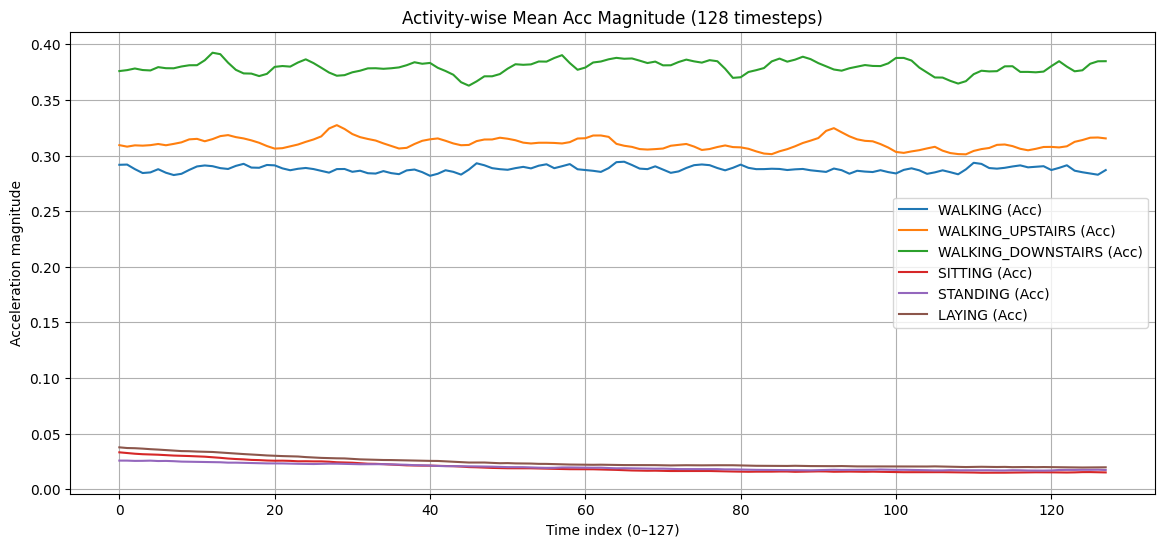

In [49]:
# Activity별 평균 파형 그리기

activities = {
    1: "WALKING",
    2: "WALKING_UPSTAIRS",
    3: "WALKING_DOWNSTAIRS",
    4: "SITTING",
    5: "STANDING",
    6: "LAYING"
}

timesteps = np.arange(acc_mag.shape[1])  # 0~127

plt.figure(figsize=(14, 6))

for act_id, act_name in activities.items():
    idx = (y_all["Activity"].values == act_id)

    # 각 Activity의 mean time-series (128 길이)
    acc_mean  = acc_mag[idx].mean(axis=0)
    gyro_mean = gyro_mag[idx].mean(axis=0)

    plt.plot(timesteps, acc_mean, label=f"{act_name} (Acc)")

plt.title("Activity-wise Mean Acc Magnitude (128 timesteps)")
plt.xlabel("Time index (0–127)")
plt.ylabel("Acceleration magnitude")
plt.legend()
plt.grid(True)
plt.show()


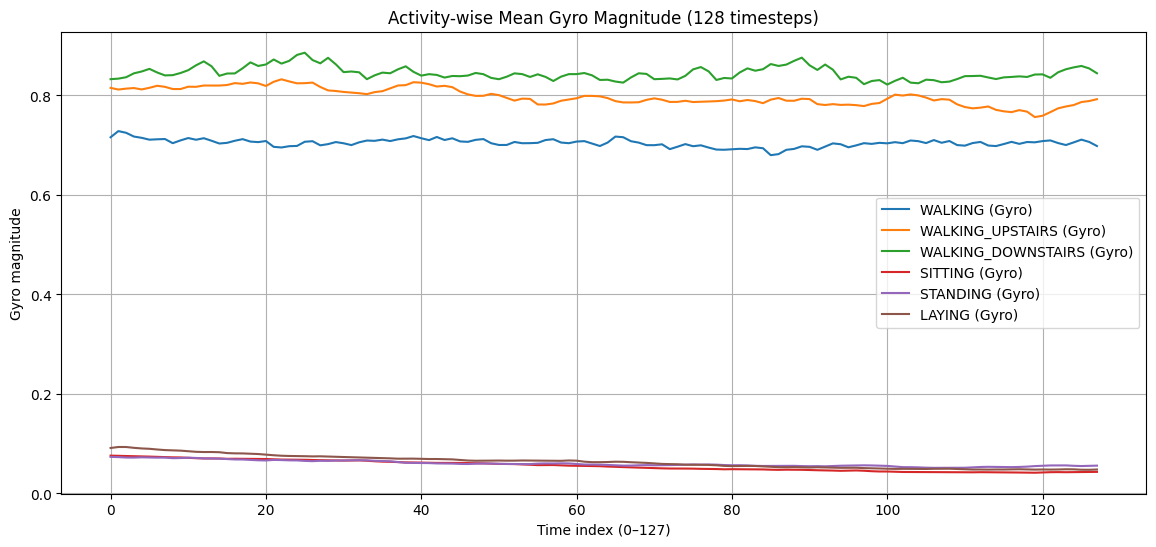

In [ ]:
# Gyro Magnitude

plt.figure(figsize=(14, 6))

for act_id, act_name in activities.items():
    idx = (y_all["Activity"].values == act_id)
    gyro_mean = gyro_mag[idx].mean(axis=0)
    plt.plot(timesteps, gyro_mean, label=f"{act_name} (Gyro)")

plt.title("Activity-wise Mean Gyro Magnitude (128 timesteps)")
plt.xlabel("Time index (0–127)")
plt.ylabel("Gyro magnitude")
plt.legend()
plt.grid(True)
plt.show()


In [ ]:
# 중력 Magnitude 계산을 위해 중력 계열 컬럼 찾기
[col for col in full_df.columns if "gravity" in col.lower()]


['tGravityAcc-mean()-X',
 'tGravityAcc-mean()-Y',
 'tGravityAcc-mean()-Z',
 'tGravityAcc-std()-X',
 'tGravityAcc-std()-Y',
 'tGravityAcc-std()-Z',
 'tGravityAcc-mad()-X',
 'tGravityAcc-mad()-Y',
 'tGravityAcc-mad()-Z',
 'tGravityAcc-max()-X',
 'tGravityAcc-max()-Y',
 'tGravityAcc-max()-Z',
 'tGravityAcc-min()-X',
 'tGravityAcc-min()-Y',
 'tGravityAcc-min()-Z',
 'tGravityAcc-sma()',
 'tGravityAcc-energy()-X',
 'tGravityAcc-energy()-Y',
 'tGravityAcc-energy()-Z',
 'tGravityAcc-iqr()-X',
 'tGravityAcc-iqr()-Y',
 'tGravityAcc-iqr()-Z',
 'tGravityAcc-entropy()-X',
 'tGravityAcc-entropy()-Y',
 'tGravityAcc-entropy()-Z',
 'tGravityAcc-arCoeff()-X,1',
 'tGravityAcc-arCoeff()-X,2',
 'tGravityAcc-arCoeff()-X,3',
 'tGravityAcc-arCoeff()-X,4',
 'tGravityAcc-arCoeff()-Y,1',
 'tGravityAcc-arCoeff()-Y,2',
 'tGravityAcc-arCoeff()-Y,3',
 'tGravityAcc-arCoeff()-Y,4',
 'tGravityAcc-arCoeff()-Z,1',
 'tGravityAcc-arCoeff()-Z,2',
 'tGravityAcc-arCoeff()-Z,3',
 'tGravityAcc-arCoeff()-Z,4',
 'tGravityAcc-corr

In [52]:
# 중력 Magnitude 계산
# Gravity mean feature 추출
gravity_cols = [
    'tGravityAcc-mean()-X',
    'tGravityAcc-mean()-Y',
    'tGravityAcc-mean()-Z'
]

# Gravity magnitude 계산
full_df['gravity_mag'] = np.sqrt(
    full_df[gravity_cols[0]]**2 +
    full_df[gravity_cols[1]]**2 +
    full_df[gravity_cols[2]]**2
)


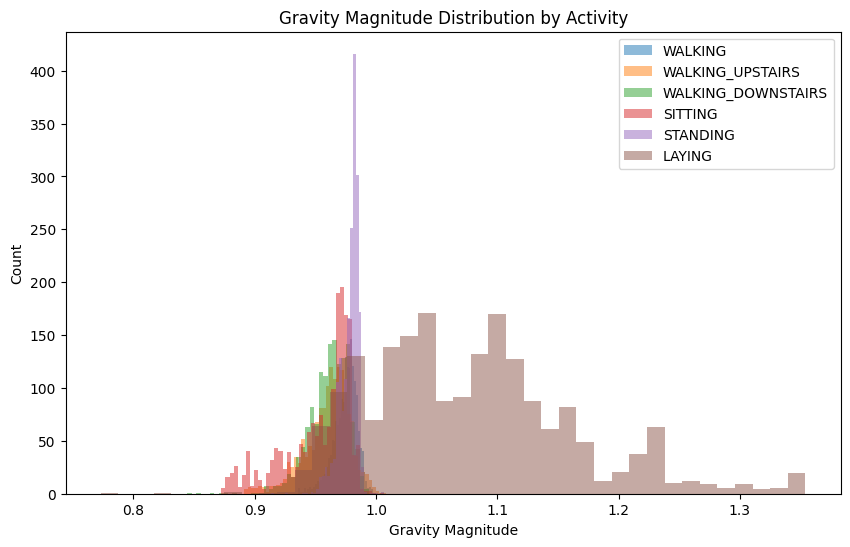

In [ ]:
# Activity별 평균 중력 Magnitude

activity_labels = {
    1: "WALKING",
    2: "WALKING_UPSTAIRS",
    3: "WALKING_DOWNSTAIRS",
    4: "SITTING",
    5: "STANDING",
    6: "LAYING"
}

plt.figure(figsize=(10,6))
for act in sorted(full_df['Activity'].unique()):
    subset = full_df[full_df['Activity'] == act]
    plt.hist(subset['gravity_mag'], bins=40, alpha=0.5, label=activity_labels[act]) # 중력은 시계열이 아님, 1 window의 중력 평균을 계산해서 1개의 값으로 저장, 그래서 히스토그램으로 표현

plt.title("Gravity Magnitude Distribution by Activity")
plt.xlabel("Gravity Magnitude")
plt.ylabel("Count")
plt.legend()
plt.show()


# 7. Feature Importance 확인 (RF, PCA)

In [54]:
# Feature Importance 추출을 위한 RF 

# Feature / Target 분리
X = full_df.drop(["Activity", "Subject"], axis=1)
y = full_df["Activity"]


In [ ]:
from sklearn.ensemble import RandomForestClassifier

# Random Forest 모델
rf = RandomForestClassifier(
    n_estimators=300,
    max_depth=None,
    random_state=42,
    n_jobs=-1
)

rf.fit(X, y)

# Feature Importance 계산
importances = rf.feature_importances_
feat_imp = pd.DataFrame({
    "feature": X.columns,
    "importance": importances
}).sort_values("importance", ascending=False)

# 상위 20개 출력
feat_imp.head(20)


,feature,importance
40,tGravityAcc-mean()-X,0.032629
52,tGravityAcc-min()-X,0.029293
50,tGravityAcc-max()-Y,0.025156
49,tGravityAcc-max()-X,0.025051
558,"angle(X,gravityMean)",0.024316
41,tGravityAcc-mean()-Y,0.023981
56,tGravityAcc-energy()-X,0.021935
559,"angle(Y,gravityMean)",0.020576
53,tGravityAcc-min()-Y,0.020265
57,tGravityAcc-energy()-Y,0.016013


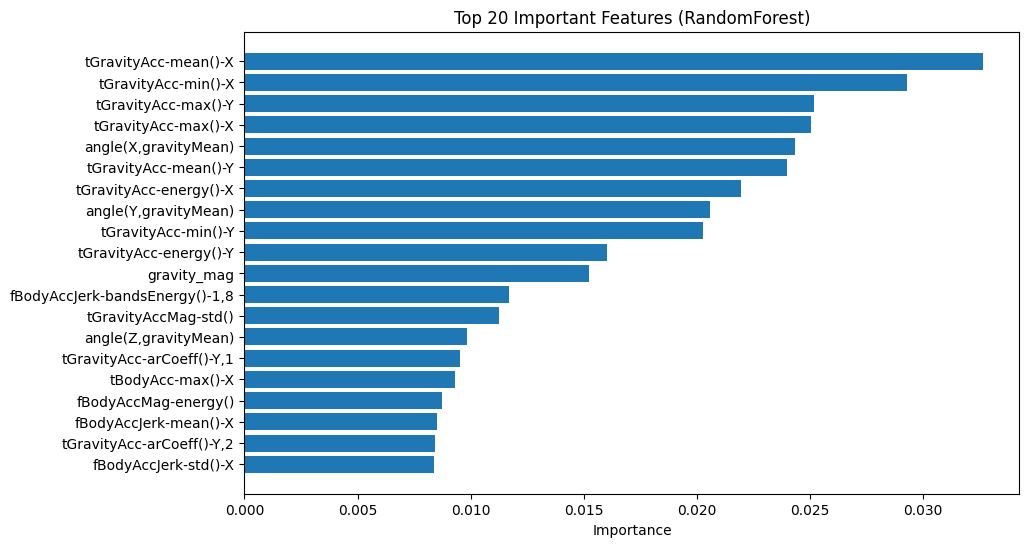

In [56]:
# 시각화
plt.figure(figsize=(10,6))
plt.barh(feat_imp.head(20)["feature"], feat_imp.head(20)["importance"])
plt.gca().invert_yaxis()
plt.title("Top 20 Important Features (RandomForest)")
plt.xlabel("Importance")
plt.show()


In [58]:
# PCA Component Loadings 분석(동적 vs 정적 활동 구분 축 파악)

from sklearn.decomposition import PCA

pca = PCA(n_components=10)   # 상위 10개만 분석
X_pca = pca.fit_transform(X)

# PCA Loadings (component weight)
loadings = pd.DataFrame(
    pca.components_.T,
    columns=[f"PC{i+1}" for i in range(10)],
    index=X.columns
)


In [59]:
# PC1 ~ PC3 까지만 보기
for i in range(3):
    print(f"\n===== Top loadings for PC{i+1} =====")
    display(loadings.iloc[:, i].abs().sort_values(ascending=False).head(15))



===== Top loadings for PC1 =====


fBodyAccJerk-entropy()-X          0.126754
fBodyAccJerk-entropy()-Y          0.124041
tBodyAccJerkMag-entropy()         0.121878
fBodyAcc-entropy()-X              0.121675
fBodyAccMag-entropy()             0.114412
fBodyBodyAccJerkMag-entropy()     0.113277
tBodyGyroJerkMag-entropy()        0.112373
fBodyAcc-entropy()-Y              0.111808
tGravityAccMag-entropy()          0.108504
tBodyAccMag-entropy()             0.108504
fBodyAccJerk-entropy()-Z          0.107748
tBodyAccJerk-entropy()-X          0.107593
fBodyBodyGyroJerkMag-entropy()    0.104784
tBodyAccJerk-entropy()-Y          0.104646
fBodyAcc-entropy()-Z              0.102721
Name: PC1, dtype: float64


===== Top loadings for PC2 =====


tGravityAcc-energy()-X       0.161948
tBodyGyroMag-entropy()       0.151491
fBodyAcc-skewness()-Z        0.149908
fBodyAcc-kurtosis()-Z        0.138779
tBodyGyroMag-arCoeff()1      0.130883
tGravityAcc-arCoeff()-Y,2    0.128974
fBodyAcc-meanFreq()-Z        0.127125
tGravityAcc-arCoeff()-Y,1    0.125599
tGravityAcc-arCoeff()-Y,3    0.123955
tGravityAcc-arCoeff()-Z,1    0.122269
tGravityAcc-max()-X          0.121896
tGravityAcc-mean()-X         0.119618
tGravityAcc-arCoeff()-Z,2    0.117093
tGravityAcc-arCoeff()-Y,4    0.115533
angle(X,gravityMean)         0.114278
Name: PC2, dtype: float64


===== Top loadings for PC3 =====


tGravityAcc-energy()-X           0.369417
angle(X,gravityMean)             0.271175
tGravityAcc-mean()-X             0.269532
tGravityAcc-min()-X              0.268996
tGravityAcc-max()-X              0.260520
tGravityAcc-correlation()-Y,Z    0.217780
tGravityAcc-energy()-Z           0.197200
fBodyAcc-kurtosis()-X            0.186169
tGravityAcc-energy()-Y           0.184530
fBodyAcc-skewness()-X            0.173143
tGravityAcc-mean()-Y             0.138524
tGravityAcc-max()-Y              0.138397
tGravityAcc-min()-Y              0.132563
tGravityAcc-correlation()-X,Z    0.125908
tGravityAcc-max()-Z              0.122909
Name: PC3, dtype: float64